In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./housing.data', sep='\s+')

In [5]:
df.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values

In [18]:
X.shape

(505, 13)

In [19]:
 y.shape

(505, 1)

In [20]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 13) (152, 13) (353, 1) (152, 1)


In [27]:
 from sklearn.linear_model import LinearRegression

In [28]:
import numpy as np

In [29]:
import scipy as sp

In [30]:
import matplotlib.pyplot as plt

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
y_train_pred = lr.predict(X_train)

In [34]:
y_test_pred = lr.predict(X_test)

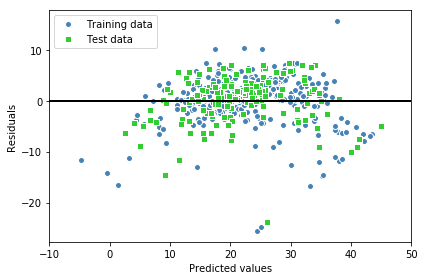

In [57]:
plt.scatter(y_train_pred, y_train_pred - y_train, 
           c='steelblue', marker='o', edgecolors='white',
           label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='limegreen', marker='s', edgecolors='white',
           label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, colors='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

In [58]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [59]:
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred), 
    mean_squared_error(y_test, y_test_pred)))

MSE train: 22.390, test: 21.382


In [60]:
print('R^2 train: %.3f, test %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.741, test 0.728


In [61]:
from sklearn.linear_model import Lasso

In [70]:
lasso = Lasso(alpha=0.8)

In [71]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
y_train_pred = lasso.predict(X_train)

In [73]:
y_test_pred = lasso.predict(X_test)

In [74]:
print(lasso.coef_)

[-0.06287433  0.0480356  -0.          0.         -0.          1.31842503
  0.03056862 -0.56540805  0.20497216 -0.01073495 -0.88479307  0.00733059
 -0.79549394]


In [75]:
print(lr.coef_)

[[-1.00187309e-01  4.53084230e-02  5.59255159e-02  2.79972642e+00
  -1.89498465e+01  3.75882434e+00  1.78635670e-02 -1.25606171e+00
   2.64216739e-01 -9.80224513e-03 -1.06234424e+00  7.67567172e-03
  -5.77719397e-01]]


In [77]:
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 26.301, test: 26.193


In [78]:
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.696, test: 0.667


In [79]:
from sklearn.linear_model import Ridge

In [80]:
ridge = Ridge(alpha=10)

In [81]:
ridge.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [82]:
y_train_pred = ridge.predict(X_train)

In [84]:
y_test_pred = ridge.predict(X_test)

In [85]:
print(ridge.coef_)

[[-9.11484293e-02  4.96374129e-02 -4.43955289e-03  1.85727289e+00
  -1.84831751e+00  3.57929160e+00  2.74372542e-03 -1.03044643e+00
   2.24128571e-01 -1.14218130e-02 -8.98006733e-01  7.86138919e-03
  -6.21775014e-01]]
